In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Exploratory Data Analysis  

We are using a Kaggle dataset from which contain Email classified `Phishing Email` or `Safe Email`   
https://www.kaggle.com/datasets/subhajournal/phishingemails

* Load the dataset
* Presentation of the dataset
* Distribution of the classes

In [3]:
# Load the data
data = pd.read_csv('data\Phishing_Email.csv')
data.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns. \n')
print('Summary statistics for the dataset:')
print(data.describe())

The dataset contains 18650 rows and 2 columns. 

Summary statistics for the dataset:
       Email Text  Email Type
count       18634       18650
unique      17537           2
top         empty  Safe Email
freq          533       11322


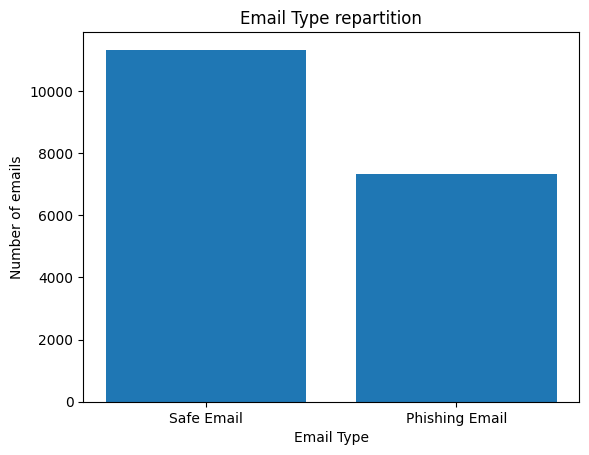

In [6]:
# Repartition of the Email type class
plt.bar(data['Email Type'].unique(), data['Email Type'].value_counts())
plt.title('Email Type repartition')
plt.xlabel('Email Type')
plt.ylabel('Number of emails')
plt.show()

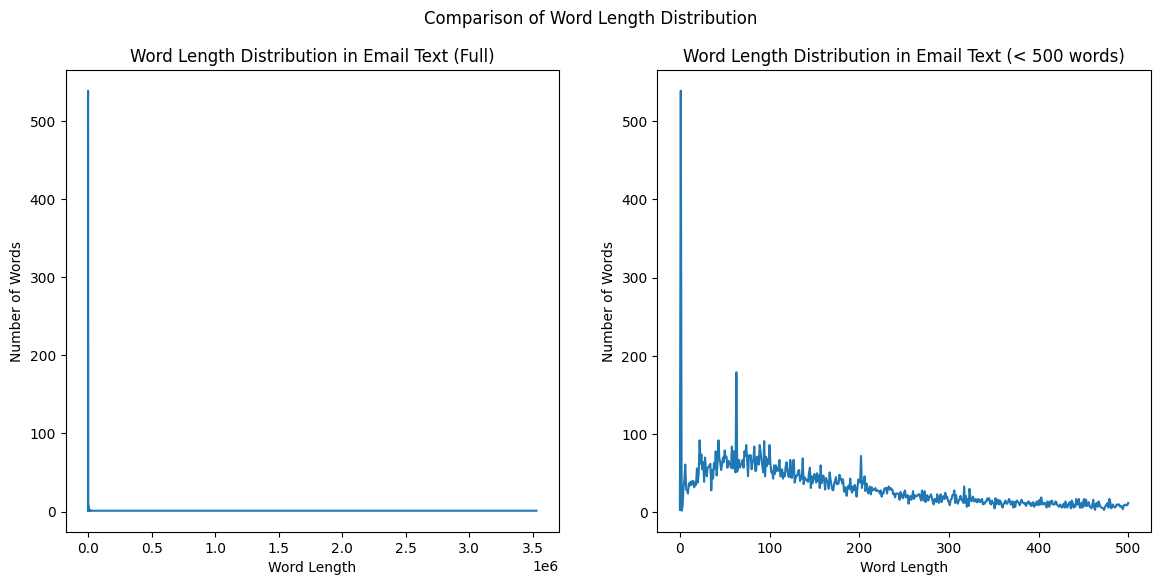

In [7]:
word_lengths = data['Email Text'].str.split().str.len()
word_length_counts = word_lengths.value_counts().sort_index()

word_lengths_filtered = word_lengths[word_lengths <= 500]
word_length_counts_filtered = word_lengths_filtered.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(word_length_counts.index, word_length_counts.values)
ax[0].set_xlabel('Word Length')
ax[0].set_ylabel('Number of Words')
ax[0].set_title('Word Length Distribution in Email Text (Full)')

ax[1].plot(word_length_counts_filtered.index, word_length_counts_filtered.values)
ax[1].set_xlabel('Word Length')
ax[1].set_ylabel('Number of Words')
ax[1].set_title('Word Length Distribution in Email Text (< 500 words)')

plt.suptitle("Comparison of Word Length Distribution")
plt.show()


Here, we can observe that one email is too lengthy, which leed to a missunderstanding of our visualization. We use another visualization of this dataset where we take only the Email which have less than 500 words. With this, We can see here that the majority of the Email contain between 0 and 300 words.  
We can also see that lots of Email have a one word, we will try to see them and take them into account when we are gonna do prediction.

In [8]:
word_lengths_filtered = word_lengths[word_lengths == 1]
data.iloc[word_lengths_filtered.index].value_counts('Email Text')

Email Text
empty                                                        533
\n4623\n                                                       1
.ukqdrblkougooeoffnxsmbowei\n                                  1
http://www.post-gazette.com/columnists/20020905brian5.asp      1
note                                                           1
revised                                                        1
website                                                        1
Name: count, dtype: int64

In [9]:
empty_emails = data[data['Email Text'] == 'empty']
print(f'Part of our Email dataset that is empty: {round(100 * empty_emails.shape[0]/data.shape[0])} %')

Part of our Email dataset that is empty: 3 %


We can see here that the majority of our Email with one word are empty. This is unsuable data.  
Obviously, Email with one word might also not be usefull to our futur ML model, we might need to delete them from our training set

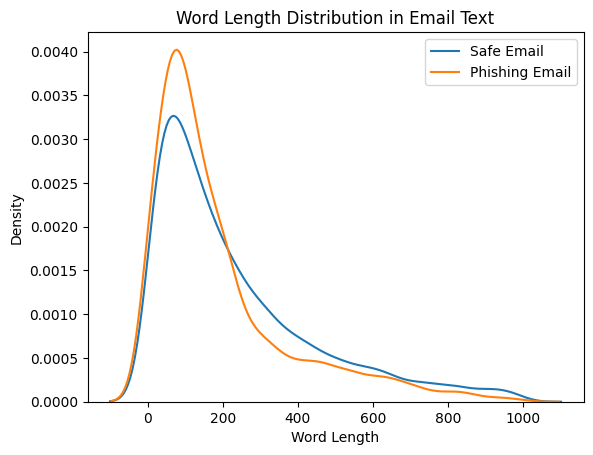

In [15]:
word_lengths_filtered = data['Email Text'].str.split().str.len()
data_filtered = data[word_lengths_filtered <= 1000]

for email_type in data_filtered['Email Type'].unique():
    sns.kdeplot(data_filtered[data_filtered['Email Type'] == email_type]['Email Text'].str.split().str.len(), label=email_type)
plt.legend()
plt.xlabel('Word Length')
plt.ylabel('Density')
plt.title('Word Length Distribution in Email Text')
plt.show()

We can't really see a correlation between the lenght of the Email and the Type of Email